In [1]:
# Imports

import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Load in data

PATH = "../data/"
df_raw = pd.read_csv(f'{PATH}churn.csv', low_memory=False, 
                     parse_dates=['canceldate', 'licence_registration_date', 'golive_date'])

In [5]:
# A quick way to view the types of data you have in your dataset

def quick_analysis(df):
 print("Data Types:")
 print(df.dtypes)
 print("Rows and Columns:")
 print(df.shape)
 print("Column Names:")
 print(df.columns)
 print("Null Values:")
 print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    
quick_analysis(df_raw)

Data Types:
username                                   object
merchant                                   object
canceldate                         datetime64[ns]
licence_registration_date          datetime64[ns]
days_active                                 int64
account_status                             object
customer_account_status                    object
nps                                       float64
licence_status                             object
cancel_reason                              object
cancel_details                             object
team                                       object
vertical                                   object
plan                                       object
last_login_days                           float64
last_login_concern                        float64
changing_platform                          object
new_platform                               object
salesperson                                object
golive_date                        dat

In [6]:
# Shows some details about each column, mean, standard distribution etc

df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
days_active,5889.0,681.559008,566.071288,0.0,196.000000,527.0,1051.00000,2269.0
nps,536.0,4.406716,3.533904,0.0,1.000000,5.0,8.00000,10.0
last_login_days,3121.0,26.167254,59.672898,0.0,0.000000,0.0,13.00000,417.0
last_login_concern,3128.0,0.287724,0.452774,0.0,0.000000,0.0,1.00000,1.0
golive_days,5889.0,67.630328,142.993069,-1.0,-1.000000,4.0,74.00000,1643.0
cases_total,2961.0,9.129348,13.097135,1.0,2.000000,5.0,10.00000,200.0
cases_open,2961.0,0.791624,1.375268,0.0,0.000000,0.0,1.00000,18.0
cases_closed,2961.0,0.791624,1.375268,0.0,0.000000,0.0,1.00000,18.0
cases_age_hours_total,2961.0,2298.929078,3299.562610,0.0,322.000000,1204.0,2977.00000,39107.0
cases_age_hours_average,23.0,318.486460,299.416169,0.0,146.795455,249.2,373.73718,1164.8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e814c50>,
      dtype=object)

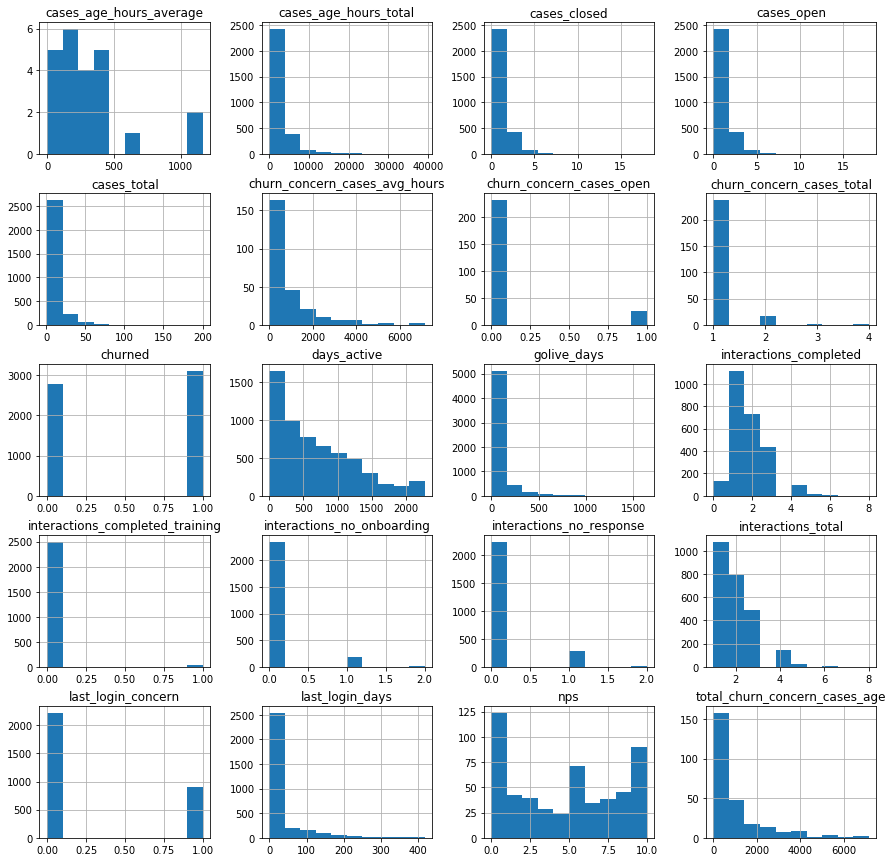

In [7]:
# Visualise number features,
# you are looking for what type of data you have, particularly looking for standard distribution
# graphs, age, height etc

df_raw[df_raw.dtypes[(df_raw.dtypes=="float64")|(df_raw.dtypes=="int64")]
                        .index.values].hist(figsize=[15,15])

In [ ]:
# Gives us a tabulated view of our mean, median and std for all number fields

array = []
for column_name in df_raw.select_dtypes(include=['float64', 'int64']).columns:
    array.append([column_name, df_raw[column_name].mean(), df_raw[column_name].median(), df_raw[column_name].std()])
    
    
print(tabulate(array,headers=['Column', 'Mean', 'Median', 'Std']))